In [167]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


# 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

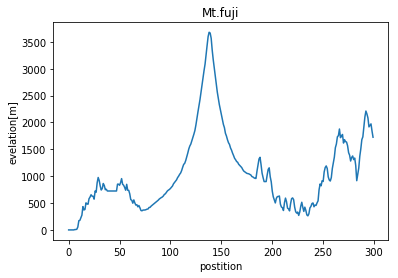

In [168]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

position = fuji[:,0]
evelation = fuji[:,3]

plt.title("Mt.fuji")
plt.xlabel("postition")
plt.ylabel("evelation[m]")
plt.plot(position,evelation)
plt.show()

# 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。


「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。


勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [169]:
def calc_garadient(position_num):
    gradient = (evelation[position_num] - evelation[position_num-1])
    return gradient

p = int(input("今いる地点:"))
print("今いる地点の勾配：{}".format(calc_garadient(p)))

今いる地点:


ValueError: invalid literal for int() with base 10: ''

# 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。


「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。


《実装上の注意》


上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

In [320]:
ALPHA = 0.2
import sys

def calc_position(position_num):
    if position_num >= 299:  #計算可能な番号か
        sys.exit("計算不可")
    else:
        gradient = calc_garadient(position_num)
        next_position = position_num - ALPHA*gradient
        
    if next_position < 0 or next_position >= 300:  #番号が０未満または３００以上の時
        return position_num
    else:
        if (next_position - int(next_position)) >= 0.5:  #四捨五入
            return int(next_position+1)
        else:
            return int(next_position)
n = int(input("n:"))
print(calc_position(n))

n:136
102


# 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

In [326]:
current_position = 300

def update_position(position_num):
    position_list = np.array([position_num])
    while 0 <= position_list[-1] < 300:
        position_list = np.append(position_list,calc_position(position_list[-1]))
        if position_list[-1] in position_list[:-1]:  #一度通ったところにまた来たら終わり
            return position_list[:-1]
    return position_list[:-1]

print("地点の更新:{}".format(update_position(current_position)))

地点の更新:[]


# 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。


《可視化例》


断面図の中に移動した地点を点で表示する  
繰り返し毎の標高や勾配を折れ線グラフにする

[136 102  98  95  93  89  85  82  79  73  70  78  77  75  75]


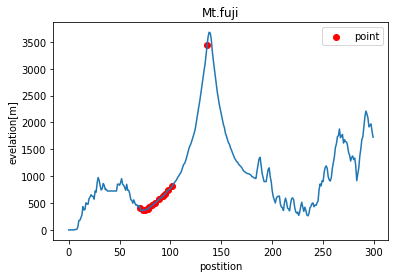

In [327]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.title("Mt.fuji")
plt.xlabel("postition")
plt.ylabel("evelation[m]")
print(position_list)
point = 136
evelation = fuji[:,3]
plt.plot(position,evelation)


position_list = update_position(point)
plt.scatter(position_list,evelation[position_list],color = "r",label="point")
#plt.xlim(50,150)
plt.legend()

plt.show()

# 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

p:133


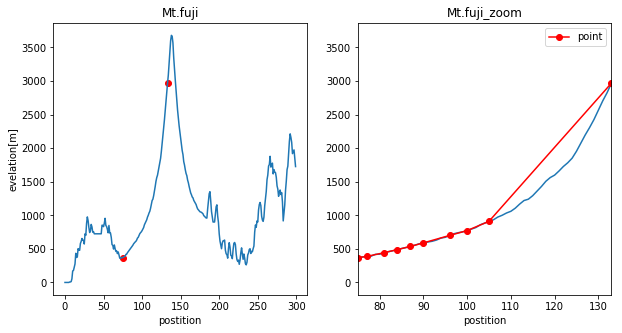

In [331]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10,5  #figureのサイズを変更

def draw_mount(p):
    p_list = update_position(p)  #通った地点を記録した配列
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)


    ax1.set_title("Mt.fuji")
    ax1.set_xlabel("postition")
    ax1.set_ylabel("evelation[m]")
    ax1.plot(position,evelation)
    ax1.scatter([np.min(p_list),np.max(p_list)],(evelation[np.min(p_list)],evelation[np.max(p_list)]),color = "r")

    position_list = update_position(point)
    ax2.plot(position,evelation)
    ax2.plot(p_list,evelation[p_list],"ro-",label="point")
    ax2.set_xlim(np.min(p_list),np.max(p_list))
    #ax2.set_xticks(p_list)
    ax2.set_title("Mt.fuji_zoom")
    ax2.set_xlabel("postition")
    #ax2.set_ylabel("evelation[m]")
    plt.legend()

    plt.show()

p = int(input("p:"))
draw_mount(p)

# 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ 
α
 を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。


p:136


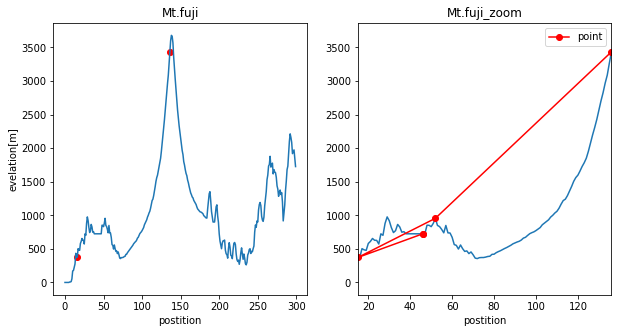

In [317]:
ALPHA = 0.5
p = int(input("p:"))
draw_mount(p)

p:136


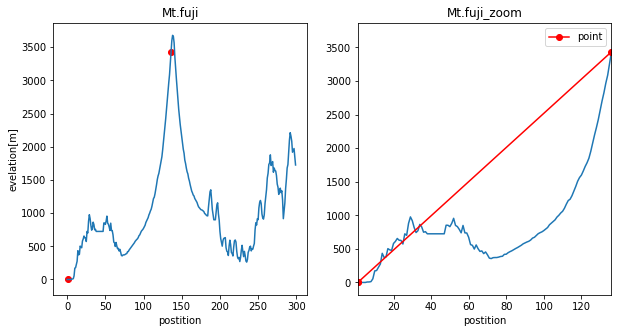

In [318]:
ALPHA = 0.8
p = int(input("p:"))
draw_mount(p)

p:136


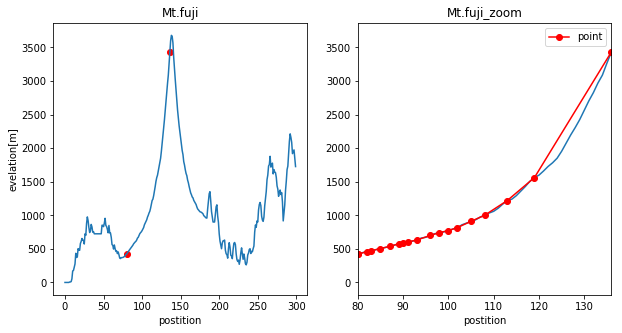

In [319]:
ALPHA = 0.1
p = int(input("p:"))
draw_mount(p)